In [1]:
import os
import seaborn as sns
import pandas as pd
sns.set_theme()

tmp_json_folder = "./"
json_files_in = sorted(
    [os.path.join(tmp_json_folder, filename) for filename in os.listdir(tmp_json_folder) if '.results' in filename])
data = []
for i, json_file_in in enumerate(json_files_in):
    print("Processing " + json_file_in)

    df = pd.read_csv(json_file_in)
    json_file_in=json_file_in[:-8]
    df.columns = [json_file_in, f'{json_file_in} metric', f'{json_file_in} value', f'{json_file_in} std']
    
    df_mean = df.groupby(f'{json_file_in} metric').mean()

    df_mean.index = df_mean.index.str.extract("[^ ]* ([^=]*)=.*",expand=False)

    data.append(df_mean)

data = pd.concat(data, axis=1)
data



Processing ./best.results
Processing ./idea1_random_sampling.results
Processing ./idea1_timewise_sampling.results
Processing ./idea2.results
Processing ./matrix_factorization.results
Processing ./popularity.results
Processing ./random.results
Processing ./result_b_40_1000_1_0.0_1e-05_all_users.results
Processing ./result_b_40_1000_1_0.0_1e-05_high_click_users.results
Processing ./result_b_40_1000_1_0.0_1e-05_low_click_users.results
Processing ./result_client_a_both_True_40_1000_1.results
Processing ./tf_idf.results


,./best,./best value,./best std,./idea1_random_sampling,./idea1_random_sampling value,./idea1_random_sampling std,./idea1_timewise_sampling,./idea1_timewise_sampling value,./idea1_timewise_sampling std,./idea2,...,./result_b_40_1000_1_0.0_1e-05_high_click_users std,./result_b_40_1000_1_0.0_1e-05_low_click_users,./result_b_40_1000_1_0.0_1e-05_low_click_users value,./result_b_40_1000_1_0.0_1e-05_low_click_users std,./result_client_a_both_True_40_1000_1,./result_client_a_both_True_40_1000_1 value,./result_client_a_both_True_40_1000_1 std,./tf_idf,./tf_idf value,./tf_idf std
NDCG@100,3,1.000000,0.000000,3,0.274740,0.021291,3,0.283978,0.026933,3,...,0.012182,3,0.221107,0.026553,3,0.328880,0.027601,3,0.282992,0.026958
NDCG@10,0,1.000000,0.000000,0,0.097623,0.023452,0,0.127594,0.039056,0,...,0.025809,0,0.042572,0.030103,0,0.218875,0.054921,0,0.153373,0.045113
Recall@10,2,0.504706,0.026017,2,0.053261,0.012698,2,0.066839,0.019209,2,...,0.010051,2,0.029412,0.020797,2,0.101452,0.019420,2,0.079848,0.021622
Recall@20,4,0.942945,0.027602,4,0.164406,0.022124,4,0.164364,0.023625,4,...,0.035474,4,0.181985,0.003899,4,0.159678,0.030570,4,0.125772,0.024143
Recall@50,5,1.000000,0.000000,5,0.403828,0.022452,5,0.403828,0.022452,5,...,0.002365,5,0.332721,0.014298,5,0.418265,0.023559,5,0.392946,0.025424
Recall@5,1,0.252353,0.013008,1,0.033712,0.009457,1,0.032592,0.013627,1,...,0.011825,1,0.029412,0.020797,1,0.040829,0.011915,1,0.038649,0.011536


In [2]:
data['@']=data.index.str.split('@').str[1].astype(int)
data['metric']=data.index.str.split('@').str[0]
data=data.sort_values(['metric','@'])

def plot(data, filters, index_filter=[],ylim=(0,0.1)):
    filters_value=filters+['value']
    data_value=data.loc[[index for index in data.index if all([filter in index for filter in index_filter])], [column for column in data.columns if
                                                        all([filter in column for filter in filters_value])]]

    filters_std=filters+['std']
    data_std=data.loc[[index for index in data.index if all([filter in index for filter in index_filter])], [column for column in data.columns if
                                                        all([filter in column for filter in filters_std])]]


    data_value.columns=data_value.columns.str.extract(f"[^/]/([^ ]*).*",expand=False)
    data_std.columns=data_std.columns.str.extract(f"[^/]/([^ ]*).*",expand=False)


    plt= data_value.plot(kind='bar',  figsize=(15, 5),grid=True,)#ylim=ylim)#,yerr=data_std,)
    if not os.path.exists("plots"):
        os.makedirs("plots")
    fig=plt.get_figure()
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.3, top=0.9)
    fig.savefig(f'plots/{"_".join(filters)}_{"_".join(index_filter)}.pdf')
    
data.columns


Index(['./best', './best value', './best std', './idea1_random_sampling',
       './idea1_random_sampling value', './idea1_random_sampling std',
       './idea1_timewise_sampling', './idea1_timewise_sampling value',
       './idea1_timewise_sampling std', './idea2', './idea2 value',
       './idea2 std', './matrix_factorization', './matrix_factorization value',
       './matrix_factorization std', './popularity', './popularity value',
       './popularity std', './random', './random value', './random std',
       './result_b_40_1000_1_0.0_1e-05_all_users',
       './result_b_40_1000_1_0.0_1e-05_all_users value',
       './result_b_40_1000_1_0.0_1e-05_all_users std',
       './result_b_40_1000_1_0.0_1e-05_high_click_users',
       './result_b_40_1000_1_0.0_1e-05_high_click_users value',
       './result_b_40_1000_1_0.0_1e-05_high_click_users std',
       './result_b_40_1000_1_0.0_1e-05_low_click_users',
       './result_b_40_1000_1_0.0_1e-05_low_click_users value',
       './result_b_40

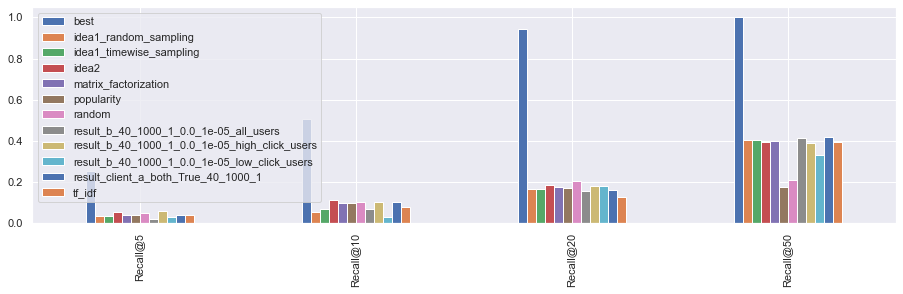

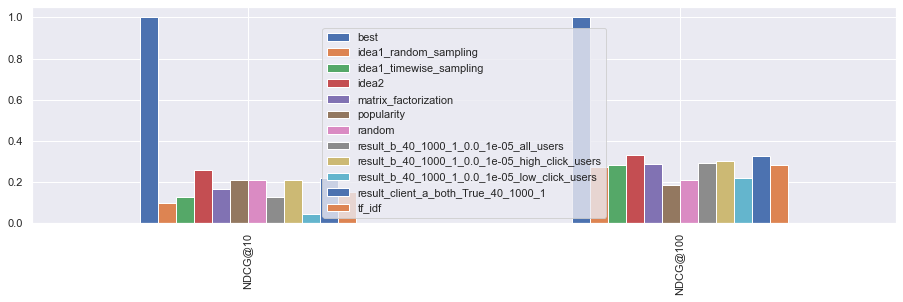

In [3]:
plot(data, [''],['Recall'])
plot(data, [''],['NDCG'])